### **Task 1. Imports and Data Loading**

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [141]:
# Para manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
from matplotlib import pyplot as plt
import seaborn as sns

# Importando os pacotes que serão usados para treinar e construir o modelo.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import packages for statistical analysis/hypothesis testing
from scipy import stats 

#Outros
from dotenv import load_dotenv
import os

Load the dataset.

In [142]:
# Load dataset into dataframe
data = pd.read_csv('tiktok_dataset.csv')

### **Task 2. Exploração**



Meu objetivo é identificar possíveis correlações, valores vazios, etc...

In [143]:
data.info()
# Verificando valores ausentes, tipos de dados e a estrutura geral do dataset.
# Já podemos ver que existem valores ausentes no dataset que precisam ser tratados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [144]:
data.shape

(19382, 12)

In [145]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [146]:
#video_view_count ranges from 20 to 999.817 views, with a mean of 254708.55. 
#For the start of the analysis, we will focus on the video_view_count column grouped by verified_status column.
#My question is: How the video_view_count is distributed among verified and unverified accounts?
data[['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']].describe()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [147]:
data['verified_status'].value_counts()
#Check the distribution of the verified_status column, which is the target variable, for this project.
#As I can see, the dataset is imbalanced, with the majority of the data being unverified accounts.

verified_status
not verified    18142
verified         1240
Name: count, dtype: int64

Check for and handle missing values.

In [148]:
# Checando pelo total de valores nulos.
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

💡 Como o objetivo final, é montar um modelo de classificação, é importante tratar os valores ausentes. Pois eles podem afetar a performance do modelo.

In [149]:
# Dropando as linhas com valores ausentes.
data.dropna(axis=0, inplace=True)

In [150]:
# Checando novamente os valores nulos, se foram realmente removidos.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


I'm interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean value of `video_view_count` for each group of `verified_status` in the sample data.

In [151]:
# Compute the mean `video_view_count` for each group in `verified_status`
(
    data.groupby('verified_status')
        .agg(Mean_View_Count= pd.NamedAgg(column='video_view_count', aggfunc='mean'))
        .assign(Percentage=lambda x: 100 * x['Mean_View_Count'] / x['Mean_View_Count'].sum())
        .reset_index()
)

,verified_status,Mean_View_Count,Percentage
0,not verified,265663.785339,74.394173
1,verified,91439.164167,25.605827


In [152]:
((265663.78533885034 / (265663.78533885034 + 91439.16416666667)) * 100) - 25.605827197250292

48.788345605499416

### **Task 3. Teste de Hipótese**

<b>The null hypotheses is:</b> The difference in the mean ocurred by chance.
<b>The Alternative hypotheses:</b> The difference in the mean has not ocurred by chance.



Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis



<b>The null hypotheses is:</b> The difference in the mean between not verified and verified status ocurred by chance.
<b>The Alternative hypotheses:</b> The difference in the mean between not verified and verified status has not ocurred by chance.

You choose 5% as the significance level and proceed with a two-sample t-test.

In [153]:
# Conduct a two-sample t-test to compare means
### YOUR CODE HERE ###

# Save each sample in a variable
not_verified = data[data["verified_status"] == "not verified"]["video_view_count"]
verified = data[data["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=np.float64(25.499441780633777), pvalue=np.float64(2.6088823687177823e-120), df=np.float64(1571.163074387424))

### **Step 4: Insights do Teste de Hipótese**

<h3>Insights</h3>
<div style="background-color: #f8f9fa; border-left: 5px solid #007bff; padding: 10px 15px; margin-top: 1em;">
  <p>
  Com base no <b>valor-p muito baixo</b>, podemos <b>rejeitar a hipótese nula</b>. Isso implica que a diferença observada é estatisticamente significativa e não ocorreu apenas por acaso.
  </p>
</div>


## Próximo Passo: Exploração de outliers e Regression Logística

Após confirmar que existe uma diferença estatística na contagem de visualizações entre contas Verificadas e Não Verificadas, agora quero construir um modelo de regressão logística para prever como cada variável afeta o resultado de uma conta ser verificada ou não.

### Exploração

In [154]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [155]:
sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="talk",
    font="segoe ui",
    font_scale=0.6,
    rc={"axes.spines.right": False, "axes.spines.top": False}
)

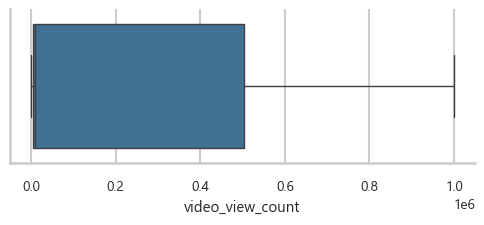

In [156]:
plt.figure(figsize=(6,2))
sns.boxplot(data=data, x='video_view_count', color='#3274a1')
plt.show()
#Likes e views são variáveis que estão relacionadas, então não irei considerar os likes para a construção do modelo, 
# por questões de multicolinearidade entre views e likes. Ver gráfico de likes e views na célula abaixo.


<Figure size 600x200 with 0 Axes>

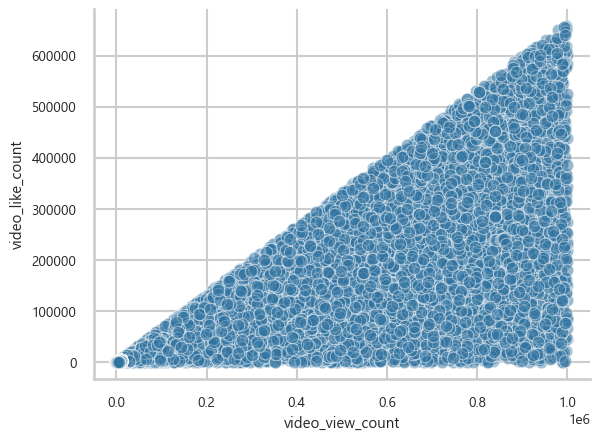

<Figure size 600x200 with 0 Axes>

In [157]:
#Mostrando a relação entre video_view_count e video_like_count comentada na célula anterior.
# Como essas duas variáveis são fortemente correlacionadas, será considerado apenas a variável video_view_count 
# para a construção do modelo de regressão.
sns.scatterplot(data=data, x='video_view_count', y='video_like_count', alpha=0.5, color='#3274a1')
plt.figure(figsize=(6,2))

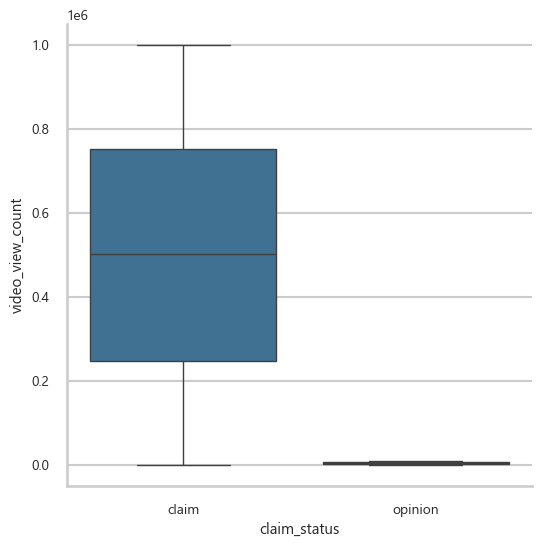

In [158]:
plt.figure(figsize=(6,6))
sns.boxplot(data=data, y='video_view_count', x='claim_status', color='#3274a1', fliersize=5)
plt.show()

<h3>Insights</h3>
<div style="background-color: #f8f9fa; border-left: 5px solid #007bff; padding: 10px 15px; margin-top: 1em;">
  <p>
  Videos categorizadas como <b>'claims'</b> tendem a ter um número <b>maior</b> de visualizações.
  O que reforça a ideia de que vídeos com claims são mais populares ou atraentes dado as possíveis controvérsias que geram.
  </p>
</div>

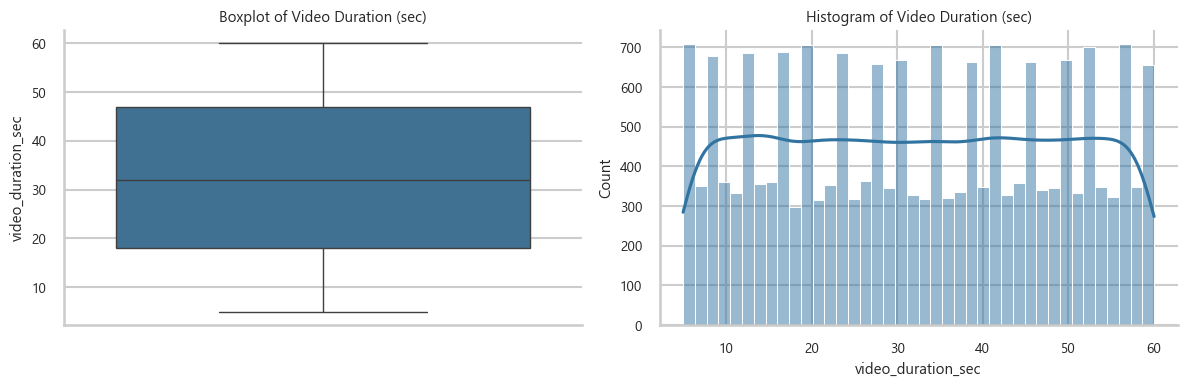

np.float64(32.0)

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Aqui consigo ver que a duração dos vídeos é bem distribuida, com a maior parte deles estando entre 20 e 50 segundos.
# Dessa forma eu não preciso lidar com outliers, pois não há muitos valores discrepantes.
sns.boxplot(data=data, y='video_duration_sec', ax=axes[0], color='#3274a1', fliersize=5)
axes[0].set_title('Boxplot of Video Duration (sec)')

# Histogram
sns.histplot(data=data, x='video_duration_sec', color='#3274a1', kde=True, ax=axes[1], bins=40)
axes[1].set_title('Histogram of Video Duration (sec)')

plt.tight_layout()
plt.show()

display(data['video_duration_sec'].median())

np.float64(292.0)

np.float64(9599.0)

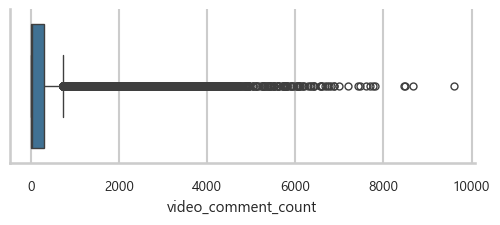

In [160]:
## Aqui é óbvio a quantidade de outliers, terei de lidar com isso, antes de construir o modelo.
display(data['video_comment_count'].quantile(0.75), data['video_comment_count'].max() ) #Para confirmar os outliers, 75% dos dados estão abaixo de 292 comentários.
plt.figure(figsize=(6,2))
sns.boxplot(data=data, x='video_comment_count', color='#3274a1', fliersize=5)
plt.show()

### Transformação dos Outliers
Como visto nos visuais acima, na columa de quantidade de comentários a diferença entre o 3 quartil e o valor máximo de número de comentários é bem grande.

Modelos de regressão linear, são muito sensíveis a outliers, dessa forma é importante lidar com eles, visto que essa variável será importante para o modelo.

A técnica a ser usada aqui é uma das mais simples, onde é dado aos valores discrepantes o valor do 3 quartil + (iqr * 1.5)

In [161]:
# `Normalizando` outliers da coluna video_comment_count.

percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

In [162]:
#Confirmando que os outliers foram normalizados.
data["video_comment_count"].max()

np.float64(728.5)

### Verificando a proporção dos dados da variável de interesse

In [163]:
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

In [164]:
# Checando a proporção de cada classe na coluna verified_status
data['verified_status'].value_counts(normalize=True)
# Essa proporção mostra que a classe "not verified" é muito maior que a classe "verified",
# o que indica um desbalanceamento de classes.

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

💡 Como há uma grande desproporção entre contas não verificadas e verificadas, é necessário balancear as classes antes de treinar o modelo de regressão logística. 

Isso é importante porque modelos de classificação podem ser tendenciosos em relação à classe majoritária, resultando em baixa capacidade de prever corretamente a classe minoritária. 

O balanceamento garante que o modelo aprenda a identificar ambas as classes de forma mais justa e eficaz.

### Balanceamento de classes

<div style="background-color: #f8f9fa; border-left: 5px solid #ffcf47; padding: 10px 15px; margin-top: 1em;">
  <p>
  ⚠️ Se o modelo for construído sobre classes com proporções muito discrepantes — como neste caso, em que cerca de <b>94%</b> das contas são não verificadas — ele pode se tornar enviesado, favorecendo a classe majoritária. 
Isso ocorre porque o algoritmo tende a aprender mais sobre a classe mais frequente, resultando em baixa capacidade de identificar corretamente a classe minoritária (contas verificadas).
  </p>
</div>

🟢O balanceamento das classes é fundamental para garantir que o modelo de regressão logística aprenda a reconhecer padrões relevantes em ambas as classes, proporcionando previsões mais justas e eficazes. Técnicas como oversampling (aumentar a classe minoritária) ou undersampling (reduzir a classe majoritária) são comumente utilizadas para corrigir esse desequilíbrio antes do treinamento do modelo.

In [165]:
data_majority = data[data['verified_status'] == 'not verified']
data_minority = data[data['verified_status'] == 'verified']

data_minority_upsampled = resample(
        data_minority,
        replace=True,  # Sample com replacement
        n_samples=len(data_majority),  # Igualar o tamanho do Dataframe "data_majority"
        random_state=42  # Resultados reprodutíveis
    )
#data_minority_upsampled.head()

data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [166]:
data_upsampled["verified_status"].value_counts(normalize=True)
# Agora com as classes igualmente balanceadas, podemos prosseguir com a análise e construção do modelo.

verified_status
not verified    0.5
verified        0.5
Name: proportion, dtype: float64

🟢 <i> Agora com as classes balanceadas, pode-se prosseguir para as etapas sequenciais. </i>

In [167]:
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(lambda text: len(text) )
data_upsampled.head() 

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [168]:
# Verificando a relação entre as variáveis numéricas, incluindo a nova coluna 'text_length' que foi adicionada.
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.001369,-0.011800,-0.698969,-0.580705,-0.503634,-0.489758,-0.610763,-0.196817
video_id,-0.001369,1.000000,0.013938,0.001607,0.005167,0.009136,0.006814,0.010564,-0.007634
video_duration_sec,-0.011800,0.013938,1.000000,0.013892,0.004610,0.001944,0.006930,-0.000080,-0.005043
video_view_count,-0.698969,0.001607,0.013892,1.000000,0.830843,0.710466,0.691557,0.747564,0.246867
video_like_count,-0.580705,0.005167,0.004610,0.830843,1.000000,0.851262,0.828637,0.779481,0.204647
video_share_count,-0.503634,0.009136,0.001944,0.710466,0.851262,1.000000,0.709738,0.671601,0.176362
video_download_count,-0.489758,0.006814,0.006930,0.691557,0.828637,0.709738,1.000000,0.794524,0.175287
video_comment_count,-0.610763,0.010564,-0.000080,0.747564,0.779481,0.671601,0.794524,1.000000,0.217179
text_length,-0.196817,-0.007634,-0.005043,0.246867,0.204647,0.176362,0.175287,0.217179,1.000000


<Axes: xlabel='text_length', ylabel='Count'>

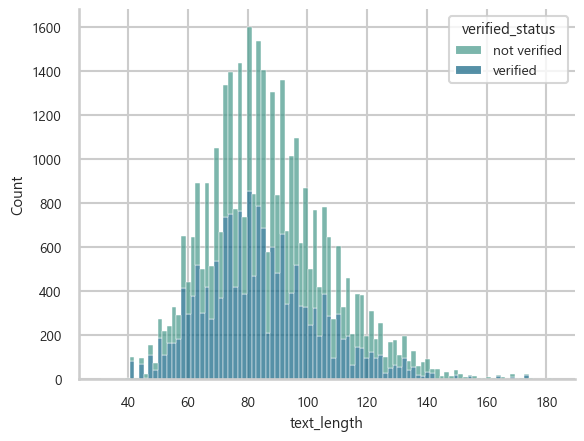

In [169]:
# Checando a relação entre o comprimento do texto e o status de verificação. 
# Parece que contas não verificadas tendem a ter transcrições mais longas, indicando que mais palavras são faladas em seus vídeos 
# em comparação com contas verificadas.
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="crest", 
             hue="verified_status", element="bars", legend=True)

<p style="background-color: #f3f3f3; color: #222;">💭 Em geral, contas que <b>não são verificadas</b> tendem a ter transcrições mais longas, indicando que mais palavras são faladas em seus vídeos em comparação com contas verificadas.</p>

<Axes: >

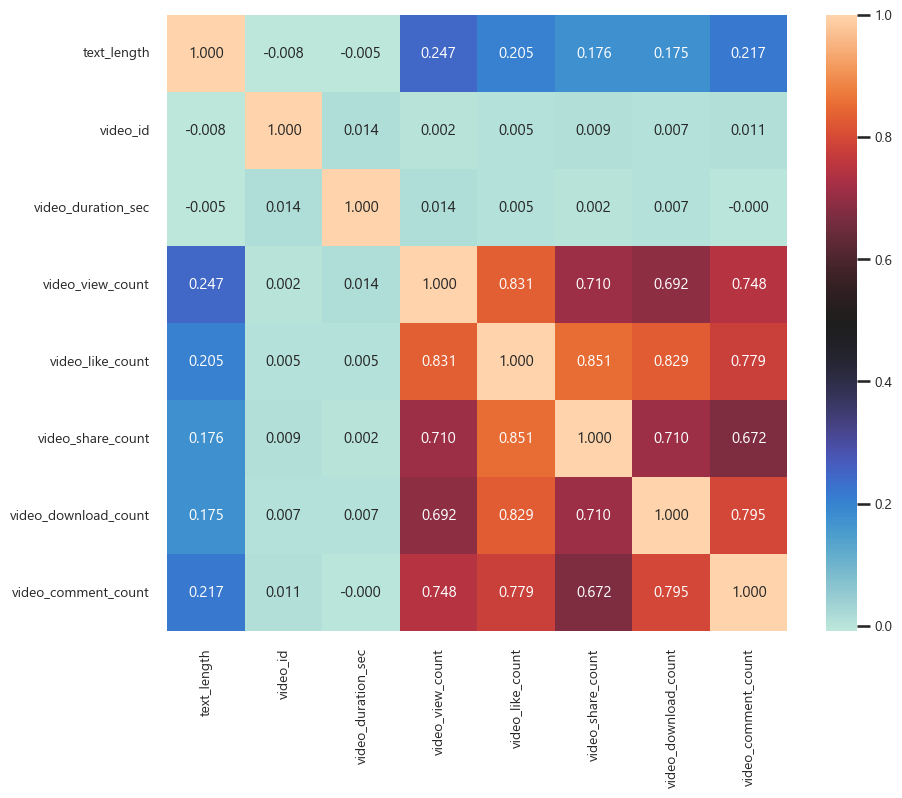

In [170]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    data_upsampled[['text_length','video_id', 'video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']].
    corr(numeric_only=True), annot=True, fmt=".3f", cmap="icefire")

<p style="background-color: #f3f3f3; color: #222;"> Apesar de a variável 'text_lenght' ter apresentado uma possível relação entre contas não verificadas, ela não teve nenhuma correlação com outras variáveis do modelo. </p>

### Selecionando as variáveis para o modelo

A Variável de interesse desse projeto que deseja-se prever é `verified_status`, pois a ideia, relembrando, é sermos capazes de agir de forma rápida a possíveis posts que vão contra a política da plataforma, e que possam espalhar informações falsas, entre outras possibilidades, que aparentemente tendem a vir de contas `não verificadas`.

In [171]:
# Variável de previsão. Variável Dependente.
y = data_upsampled['verified_status']

In [172]:
# Variáveis independetes (features). Essas são as variáveis que serão usadas para prever a variável de interesse.
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count", 'text_length']]

# Primeiras linhas.
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count,text_length
0,59,claim,under review,343296.0,241.0,1.0,0.0,97
1,32,claim,active,140877.0,19034.0,1161.0,684.0,107
2,31,claim,active,902185.0,2858.0,833.0,329.0,137
3,25,claim,active,437506.0,34812.0,1234.0,584.0,131
4,19,claim,active,56167.0,4110.0,547.0,152.0,128


In [173]:
X.shape

(35768, 8)

### Separando o que será treinado e o que será testado. 

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [175]:
display(X_train.shape), display(X_test.shape), display(y_train.shape), display(y_test.shape)

(26826, 8)

(8942, 8)

(26826,)

(8942,)

(None, None, None, None)

### Hora de traduzir as variáveis categóricas para numéricas através de uma codifiação

#### Primeiro com relação às variáveis independentes (X)

In [176]:
X_train.dtypes
# Como posso ver, as variáveis 'claim_status' e 'author_ban_status' são categóricas, enquanto as outras são numéricas.
# Precisamos transformar essas variáveis categóricas em variáveis numéricas para que o modelo possa interpretá-las corretamente.

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
text_length               int64
dtype: object

In [177]:
display(X_train['claim_status'].unique() )
display(X_train['author_ban_status'].unique())

array(['opinion', 'claim'], dtype=object)

array(['active', 'banned', 'under review'], dtype=object)

In [178]:
X_train_to_encode = X_train[['claim_status', 'author_ban_status']]
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [179]:
# Montando o OneHotEncoder para transformar as variáveis categóricas em variáveis numéricas.
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [180]:
# Transformando e ajustando o OneHotEncoder nas variáveis categóricas.
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [181]:
X_encoder.categories_

[array(['claim', 'opinion'], dtype=object),
 array(['active', 'banned', 'under review'], dtype=object)]

In [182]:
# Pegando os nomes das colunas após a codificação
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [183]:
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], shape=(26826, 3))

In [184]:
# Transformando o array resultante do OneHotEncoder em um DataFrame para facilitar a visualização e manipulação.
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Mostrando as primeiras linhas do DataFrame codificado.
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [185]:
display(X_train_encoded_df.head())
display(X_train['claim_status'].head())

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


33058    opinion
20491    opinion
25583    opinion
18474    opinion
27312    opinion
Name: claim_status, dtype: object

In [186]:
X_train.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count,text_length
33058,6,opinion,active,238.0,6.0,0.0,0.0,94
20491,51,opinion,active,5002.0,480.0,12.0,1.0,88
25583,32,opinion,active,2042.0,145.0,11.0,3.0,87
18474,24,opinion,active,2334.0,13.0,17.0,0.0,92
27312,9,opinion,active,7125.0,365.0,19.0,6.0,65


In [187]:
# Como usarei as novas colunas codificadas, preciso concatenar o DataFrame codificado com o DataFrame original, e retirar as colunas originais que estão em formato 'object'.
#X_train.drop(columns=["claim_status", "author_ban_status"]).head()
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

In [188]:
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,6,238.0,6.0,0.0,0.0,94,1.0,0.0,0.0
1,51,5002.0,480.0,12.0,1.0,88,1.0,0.0,0.0
2,32,2042.0,145.0,11.0,3.0,87,1.0,0.0,0.0
3,24,2334.0,13.0,17.0,0.0,92,1.0,0.0,0.0
4,9,7125.0,365.0,19.0,6.0,65,1.0,0.0,0.0


#### Agora a variável dependente (Y)

In [189]:
y_train.dtype

dtype('O')

Como a variável está como tipo objeto, é importante que também seja transformada para numérica, da mesma forma que as variáveis independentes (X)

In [190]:
# Checando a unicidade dos valores na variável dependente (y_train).
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [191]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [192]:
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_train_final

array([1., 1., 1., ..., 1., 1., 0.], shape=(26826,))

In [193]:
# Criando o modelo de regressão logística com os dados de treino.
log_clf = LogisticRegression(max_iter=5000, random_state=0).fit(X_train_final, y_train_final)

#### Codificando as variáveis de teste para utilizar o modelo criado

In [194]:
# Selecionando as colunas que serão transformadas.
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,opinion,active
5727,claim,active
11607,opinion,active


In [195]:
# Codificando...
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], shape=(8942, 3))

In [196]:
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [197]:
X_train_encoded.shape

(26826, 3)

In [198]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [199]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,27,519.0,65.0,1.0,0.0,65,1.0,0.0,0.0
1,60,7539.0,181.0,0.0,0.0,64,1.0,0.0,0.0
2,59,5129.0,179.0,2.0,0.0,102,1.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,105,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,51,1.0,0.0,0.0


In [200]:
# Usando o modelo de regressão logística para obter previsões no conjunto de teste codificado
y_pred = log_clf.predict(X_test_final)
y_pred

array([1., 1., 1., ..., 1., 1., 1.], shape=(8942,))

In [201]:
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

In [202]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()
y_test_final

array([1., 1., 1., ..., 0., 1., 1.], shape=(8942,))

In [203]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape
# Como posso ver, as dimensões dos dados de treino e teste estão corretas, 
# e os dados estão prontos para serem usados no modelo de regressão logística.

((26826, 9), (26826,), (8942, 9), (8942,))

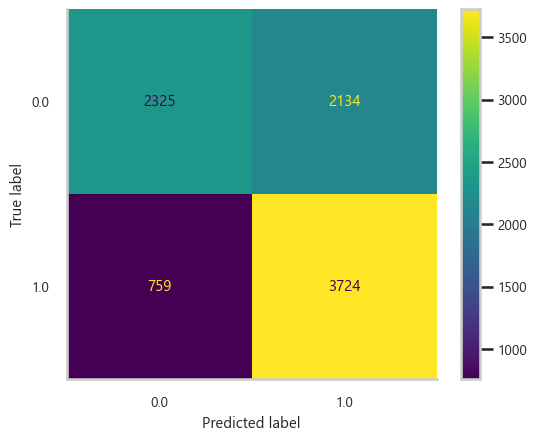

In [204]:
# Construindo a matriz de confusão para avaliar o desempenho do modelo.
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Criando o gráfico de matriz de confusão
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
fig, ax = plt.subplots()
log_disp.plot(ax=ax)
ax.grid(False)  # Remover as gridlines
# Mostrar o gráfico
plt.show()

In [205]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
pd.DataFrame(classification_report(y_test_final, y_pred, target_names=target_labels, output_dict=True)).transpose()

,precision,recall,f1-score,support
verified,0.753891,0.521417,0.616466,4459.000000
not verified,0.635712,0.830694,0.720240,4483.000000
accuracy,0.676471,0.676471,0.676471,0.676471
macro avg,0.694801,0.676056,0.668353,8942.000000
weighted avg,0.694643,0.676471,0.668492,8942.000000


### Resultados do modelo

In [206]:
len(log_clf.feature_names_in_)

9

In [207]:
len(log_clf.coef_[0])

9

In [208]:
# Pegando os nomes e coeficientes do modelo de regressão logística.
# Colocando em um DataFrame para facilitar a leitura
coefficients = pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})
coefficients.sort_values(by='Model Coefficient', ascending=False, inplace=True)

In [209]:
coefficients['Odds_ratio'] = np.exp(coefficients['Model Coefficient'])
coefficients

,Feature Name,Model Coefficient,Odds_ratio
6,claim_status_opinion,1.728906e+00,5.634485
4,video_comment_count,6.162249e-04,1.000616
2,video_share_count,5.320710e-06,1.000005
1,video_view_count,-1.447861e-07,1.000000
3,video_download_count,-1.265026e-04,0.999874
5,text_length,-6.833133e-04,0.999317
0,video_duration_sec,-1.689246e-03,0.998312
8,author_ban_status_under review,-1.127433e-01,0.893380
7,author_ban_status_banned,-4.096638e-01,0.663873


In [210]:
coefficients['Odds_Ratio_not_verified'] = 1 / coefficients['Odds_ratio']
coefficients

,Feature Name,Model Coefficient,Odds_ratio,Odds_Ratio_not_verified
6,claim_status_opinion,1.728906e+00,5.634485,0.177479
4,video_comment_count,6.162249e-04,1.000616,0.999384
2,video_share_count,5.320710e-06,1.000005,0.999995
1,video_view_count,-1.447861e-07,1.000000,1.000000
3,video_download_count,-1.265026e-04,0.999874,1.000127
5,text_length,-6.833133e-04,0.999317,1.000684
0,video_duration_sec,-1.689246e-03,0.998312,1.001691
8,author_ban_status_under review,-1.127433e-01,0.893380,1.119345
7,author_ban_status_banned,-4.096638e-01,0.663873,1.506311


In [212]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
display(pd.DataFrame(classification_report(y_test_final, y_pred, target_names=target_labels, output_dict=True)).transpose())
display(coefficients.sort_values(by='Odds_Ratio_not_verified', ascending=False))

,precision,recall,f1-score,support
verified,0.753891,0.521417,0.616466,4459.000000
not verified,0.635712,0.830694,0.720240,4483.000000
accuracy,0.676471,0.676471,0.676471,0.676471
macro avg,0.694801,0.676056,0.668353,8942.000000
weighted avg,0.694643,0.676471,0.668492,8942.000000


,Feature Name,Model Coefficient,Odds_ratio,Odds_Ratio_not_verified
7,author_ban_status_banned,-4.096638e-01,0.663873,1.506311
8,author_ban_status_under review,-1.127433e-01,0.893380,1.119345
0,video_duration_sec,-1.689246e-03,0.998312,1.001691
5,text_length,-6.833133e-04,0.999317,1.000684
3,video_download_count,-1.265026e-04,0.999874,1.000127
1,video_view_count,-1.447861e-07,1.000000,1.000000
2,video_share_count,5.320710e-06,1.000005,0.999995
4,video_comment_count,6.162249e-04,1.000616,0.999384
6,claim_status_opinion,1.728906e+00,5.634485,0.177479


## Considerações e Insights

### Considerações:

1. No momento da codificação das variáveis as funções levam em consideração a ordem baseada no alfabeto, dessa forma a variável considerada como 0 foi 'not verified' consequentemente a variável 'verified' como 1. Com isso, os coeficientes apresentados na tabela final, especificamente na coluna "Model Coefficient", se referem às variáveis que afetam a probabilidade de uma conta ser **Verificada**.

2. Por isso foi criado uma coluna extra no dataframe de coeficientes considerando o oposto das "Odds_Ratio" para facilitar a interpretação. Calculado como 1 / Odds_Ratio, gerando a coluna Odds_Ratio_not_verified.

3. Como a variável de interesse é 'not verified' que significa uma conta não ser verificada na plataforma, na matriz de confusão, isso seria caracterizado como um Verdadeiro negativo, ou seja a quantidade de registros que foram corretamente categorizadas como 'not verified' que para o modelo tinha valor 0.

### Conclusões:

Após as considerações, devemos olhar então para a coluna **_Odds_Ratio_not_verified_**

A Variável `author_ban_status_banned` ou seja, uma conta que foi banida, indica um grande impacto na conta ser `não verificada` seguida pela variável `author_ban_status_under review` o que reforça a ideia de que essas contas tendem a postar vídeos de conteúdo questionável e devem ser monitoradas, de fato. Em contra partida a variável `claim_status_opinion` nos diz que quando um post se refere a uma opinião, a chance de a conta ser não verificada cai drásticamente, como suspeitado desde o início.

O modelo de Regressão Logística demonstrou uma forte capacidade de cumprir o objetivo principal do projeto: identificar contas não verificadas. A performance do modelo para esta classe atingiu um recall de **83%** (também conhecido como Especificidade), provando sua eficácia em encontrar a grande maioria do público-alvo. 
Este alto poder de detecção resultou em uma precisão de 64%, indicando a presença de alguns falsos alarmes, porém ainda é melhor do que uma escolha randômica que teria 50% de chances de acerto. No entanto, o F1-Score de 72% confirma que o modelo possui um desempenho geral robusto e equilibrado para esta tarefa específica, estabelecendo um excelente baseline para futuras otimizações.

